In [ ]:
!pip install easyocr

In [ ]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image
#from numba import njit, prange
from joblib import Parallel, delayed

ModuleNotFoundError: No module named 'easyocr'

In [ ]:
img_path = "scaned_img_0.jpg"

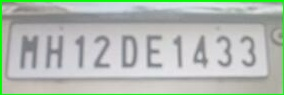

In [ ]:
Image(img_path)

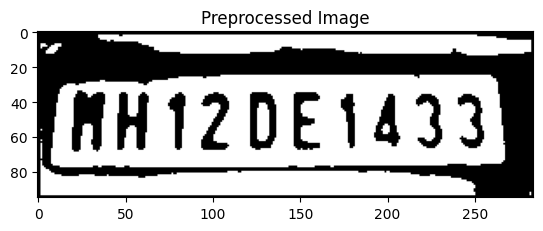

In [ ]:
image = cv2.imread(img_path)
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to reduce noise while keeping edges sharp
filtered = cv2.bilateralFilter(gray, 11, 17, 17)

# Apply thresholding
_, thresh = cv2.threshold(filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the preprocessed image
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title('Preprocessed Image')
plt.show()

In [ ]:

reader = easyocr.Reader(['en'])

In [ ]:
# Define a function to process OCR on a single image
def process_ocr(img):
    # Read the text from the image
    output = reader.readtext(img)
    return output

In [ ]:
# Perform OCR in parallel
output = Parallel(n_jobs=-1)(delayed(process_ocr)(img_path) for _ in range(1))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
output

[[([[13, 29], [262, 29], [262, 74], [13, 74]],
   '0HIZ DE1433',
   0.3642031607188293)]]

In [ ]:
cord = output[-1][0]

In [ ]:
cord

([[10, 7], [102, 7], [102, 36], [10, 36]], 'Mzeuiell', 0.024138251571547916)

In [ ]:
cord, _, _ = output[-1][0]


In [ ]:
# Find the bounding box coordinates
x_values = [coord[0] for coord in cord]
y_values = [coord[1] for coord in cord]
x_min = min(x_values)
y_min = min(y_values)
x_max = max(x_values)
y_max = max(y_values)

array([[[  1, 253,   4],
        [  1, 252,   1],
        [  6, 255,   2],
        ...,
        [  5, 255,   1],
        [  0, 253,   0],
        [  7, 255,   2]],

       [[  2, 254,   5],
        [ 17, 250,  14],
        [ 36, 234,  22],
        ...,
        [ 44, 229,  35],
        [ 35, 238,  29],
        [ 13, 248,   7]],

       [[  0, 252,   3],
        [ 32, 232,  24],
        [ 72, 167,  39],
        ...,
        [ 38,  92,  23],
        [  5, 109,   0],
        [ 34, 238,  25]],

       ...,

       [[  0, 255,   0],
        [ 33, 233,  31],
        [  0,  80,   0],
        ...,
        [ 33,  59,  65],
        [  3,  87,  28],
        [ 32, 227,  40]],

       [[  0, 253,   3],
        [ 27, 238,  28],
        [  0, 102,   0],
        ...,
        [  1,  89,  19],
        [  0, 108,   0],
        [ 20, 238,  24]],

       [[  0, 251,   4],
        [ 22, 239,  24],
        [ 71, 208,  62],
        ...,
        [ 78, 195,  86],
        [ 58, 209,  62],
        [ 17, 246,  19]]], dtype=uint8)
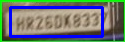

In [ ]:
# Display the bounding box on the image
image = cv2.imread(img_path)
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

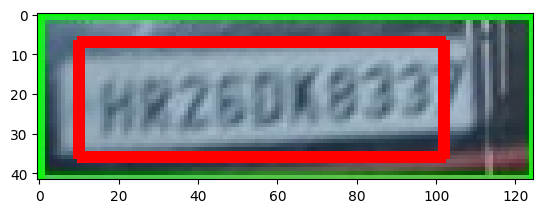

In [ ]:
# Display the image with bounding box
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))